
<p style="text-align:center;font-size:50px"><b>Bertologia</b></p>


<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:45%" align="left">

<img src="http://ccsl.ime.usp.br/files/unmanaged/logos/logoIME+Texto.png"  style="height:45%;width:10%" align="right">

## Agenda

   - Momento Computer Vision em NLP: ULMFit
   - Open AI Transformer
   - GPT-1 vs GPT-2 vs GPT-3
   - BERT 
   - Bertologia
   - Miscelania (só se der tempo se não fica pra próxima aula)

# Momento Computer Vision em NLP

## Transfer Learning

Um dos grandes motivos responsáveis para o _boom_ de Deep Learning em meados de 2014 foi uma técnica conhecida como **Transfer Learning**. Ela pode ser definida como a seguinte:

> Transfer learning and domain adaptation refer to the situation where what has been learned in one setting … is exploited to improve generalization in another setting

[Deep Learning Book](https://www.deeplearningbook.org/contents/representation.html)


<center><img src='images/transfer_learning.jpeg'></center>

Então, basicamente, a gente treina uma rede neural pesada para uma task grande, como o ImageNet, **pegamos os pesos da rede treinada** e treinamos uma nova rede para uma task menor, inicializando ela com esses pesos aprendidos na tarefa anterior

## Mas como isso é possível em NLP?

A ideia de combinar a ideia de combinar transfer learning com o que ficou conhecido como aprendizado auto-surpervisionado.

> Self-supervised learning: Training a model using labels that are embedded in the independent variable, rather than requiring external labels. For instance, training a model to predict the next word in a text.

[Fast.ai book- Chapter 10](https://github.com/fastai/fastbook/blob/master/10_nlp.ipynb)

A tarefa, no caso de NLP, um tipo de modelo que entra nessa categoria de aprendizado auto surpervisionado é conhecida como **modelo de linguagem**

### Modelo de Linguagem

Um modelo de linguagem é capaz de determinar a _fluência_ de um texto. Na prática, o desafio é, **com base nas palavras que eu vi até agora, qual deve ser a próxima palavra?**

$$
\begin{array}{c}
P(w_n|w_0, w_1, w_2, \dots, w_{n-1})
\end{array}
$$

Qual a intuição para isso funcionar?

#### Regra de Probabilidade Condicional

$$
\begin{array}{ll}
P(w_0, w_1, w_2, \dots, w_n) & = P(w_0) \times P(w_1|w_0) \dots \times P(w_n|w_0, w_1, w_2, \dots, w_{n-1}) \\
& = \displaystyle \prod_{i} P(w_n|w_0, w_1, w_2, \dots, w_{n-1})
\end{array}
$$

P(Eu gosto de abacate) = P(Eu) $\times$ P(gosto|Eu) $\times$ P(de|Eu, gosto) $\times$ P(abacate|Eu, gosto, de)

Percebam que tendo um modelo assim, a gente **não precisa de labels** e, logo, o próprio dado de treinamento pode ser usado para gerar as labels e, assim, treinar algo! Daí a ideia de **auto surpervisionado**

<img src='images/yann_lecunn_quote.jpg'  style="height:70%;width:40%" align="left">

<img src='images/yann_lecunn_slides.jpg' align="right">

## ULMFit

Em Janeiro de 2018, Sebastian Ruder e Jeremy Howard tiveram a ideia de combinar essas duas técnicas, modelo que eles nomearam de [**ULMFit**](https://arxiv.org/abs/1801.06146) ou _Universal Language Model Fine-tuning_

![](images/ulmfit.png)
[fastai book](https://github.com/fastai/fastbook/blob/master/10_nlp.ipynb)

A ideia é criar um modelo de Linguagem "genérico", treinado com base no Wikipedia. Disso, fazemos uma etapa de fine-tuning no nosso dataset objetivo, **com a ideia de que o modelo aprenda o linguajar específico desse domínio** e, então, fazemos uma etapa final de treinamento _focando na nossa tarefa final_, como um classificador de sentimentos de filmes por exemplo.

## Mas e a Arquitetura?

Para treinar esses modelos, foi utilizada a seguinte arquitetura:

- [AWD LSTM](https://arxiv.org/pdf/1708.02182.pdf), que pode ser entendida como uma LSTM com algumas tecnicas a mais de otimização e regularização :)

<center><img src='images/ulmfit_example.png'  style="height:70%;width:70%"></center>

[overview ulmfit](https://humboldt-wi.github.io/blog/research/information_systems_1819/group4_ulmfit/#overviewulmfit)

Por fim, a loss, utilizada é a boa e velha _Cross Entropy Loss_ :)

In [152]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

# define model
vocab_size = 1000
embed_dim = 50  # tamanho do Embedding de cada token
maxlen = 200  # Tamanho máximo da sentença

In [2]:
# Seu código aqui
tokenizer_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    standardize='lower_and_strip_punctuation',
    split='whitespace', ngrams=None, output_mode="int",
    output_sequence_length=maxlen, pad_to_max_tokens=False)
tokenizer_layer.adapt(np.array(["O rato roeu a roupa do rei de roma"]))

inputs = layers.Input(shape=(1,), dtype=tf.string, name='input_text')
embedding_layer = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)

In [3]:
x = tokenizer_layer(inputs)    
x = embedding_layer(x)
x = layers.LSTM(units=1)(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

# Mas atenção não é tudo que a gente precisa?

Contudo, lembrem que na útlima aula vimos um paper que saiu em no meio de 2017, o **Attention is All you need**? Nele, foi apresentado a arquitetura Transformer



<center><img src='images/transformer.png'  style="height:20%;width:20%"></center>


Acontece que a ideia tida por [Radford et. al](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf) em Junho de 2018 foi a de usar a parte **decoder** da rede para o processo de aprendizado auto surpervisionado! Esse modelo ficou conhecido como **Open AI Transformer**, ou GPT-1

<center><img src='images/transformer-decoder.png'  style="height:20%;width:20%"></center>

[attention? attention!](https://lilianweng.github.io/lil-log/2018/06/24/attention-attention.html#decoder)

* A diferença é que no caso desse modelo do Open AI $N=12$ :)

In [2]:
from IPython.display import Video

Video("images/TransformerDecoderExample.mp4")

Basicamente, então, também é valido dizer que o GPT é um modelo **auto regressivo**. Ou sejam a medida que ele aprende uma palavra, **ele usa ela como informação para a próxima**

<center><img src='http://jalammar.github.io/images/xlnet/gpt-2-autoregression-2.gif'></center>

[Illustrated GPT-2](http://jalammar.github.io/)

As diferenças entre os GPT's são arquiteturais, como veremos daqui a pouco :)


## Fine Tuning

Seguindo, a ideia de pós treinamento auto surpervisionado, os autores propuseram fazer fine-tunings específicos, dependendo do tipo de task utilizada. 

Um Token [CLS] ou [s] é **introduzido** na etapa de fine-tuning e aprendido nessa etapa

<center><img src='images/open-ai-finetuing.png' style="height:50%;width:50%"></center>

[open AI transformer paper](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf)

A diferença aqui, é que no processo de Finetuing, dois novos Embeddings são adicionados: o de _start_ **\<s\>** e _extract_ **\<e\>**

## E aí a grande revolução em NLP começou :)

<center><img src='images/open-ai-finetuning-results.png' style="height:50%;width:50%"></center>
    
[open AI transformer paper](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf)

# GPT2 e GPT3

Uma evolução do trabalho do Open AI Tranformer (ou GPT-1) foram justamente seus sucessores que ficaram famosos, o GPT-2 e o GPT-3

> I should also point out that what makes GPT-2 worthy of the “2” is massive scale. While BERT has a respectable 340 million parameters, GPT-2 blows it out of the water with a whopping 1.5 billion parameters. https://blog.floydhub.com/gpt2/


Além disso, GPT-2 Introduziu a arquitetura sparse Transformer para lidar com sequências longas


![](images/gpt2-intro.png)

![](images/gpt-2params.png)

## GPT-3

> We use the same model and architecture as GPT-2 including the modified initialization, pre-normalization, and reversible tokenization described therein, with the exception that we use alternating dense and locally banded sparse attention patterns in the layers of the transformer, similar to the Sparse Transformer (https://arxiv.org/pdf/2005.14165.pdf)

![](images/gpt-3intro.png)

![](images/gpt-3params.png)

![](images/gpt3-flaw.jpeg)

[Doctor GPT-3: hype or reality?](https://www.nabla.com/blog/gpt-3/)

# BERT

Apesar do artigo do GPT-1 ser impressionante para a época, alguns meses depois, em Outubro do mesmo ano (o GPT foi lançado em Junho), o pessoal do Google propôs usar a parte **encoder** do transformer, junto de outras modificações leves, dando ao modelo o nome de **B**idirectional **E**ncoder **R**epresentations from **T**ransformers (BERT)

## Encoder Layer

Relembrando o Encoder Layer dos Transformers

<center><img src='images/transformer-encoder.png'  style="height:30%;width:30%"></center>

[attention? attention!](https://lilianweng.github.io/lil-log/2018/06/24/attention-attention.html#encoder)

* A diferença é que no caso desse modelo do BERT $N=12$ ou $N=24$ :)

A primeira diferença é **abandonar o Mask Multi Head** e usar direto o **Multi Head Attention**, daí o nome birecional!


Mas se fazemos isso, não estamos **overfittando** o modelo já que vamos olhar o contexto futuro para prever a palavra atual?

Solução: usar **outro processo de treinamento**

### A Loss no BERT

A grande sacada do BERT é que foi proposto uma nova forma de treinar, justamente por ele ser **bidirecional**. O processo de treinamento visa otimizar **duas** tarefas que são aprendidas **ao mesmo tempo**

#### Tarefa 1 Masked Language Model

A ideia é simples: dado um input de entrada, uma certa porcentagem (cerca de 15% segundo o paper) das palavras desse texto de entrada é máscarada (ou seja, trocadas por um token [MASK]). A tarefa é prever as palavras que foram escondidas. Daí, a última camada da rede tenta prever **apenas** a palavra que foi ocultada e, logo, **o BERT não pode ser usado para gerar sequências!!!**


Contudo, como as palavras escondidas são mascaradas com [MASK], isso gera uma discrepância entre os modelos de pré treino e finetuning já que os datasets de finetuning não terão esse token especial. Daí, outra sacada foi simplesmente embaralhar as palavras. Segundo o paper, dado um input, 15% das palavras são escolhidas como tokens para serem trocados. Com esses tokens selecionados, 80% das vezes eles viram [MASK], 10% das vezes eles são trocados por outro token e 10% das vezes eles são mantidos iguais.


#### Tarefa 2 Next Sentence Prediction

A ideia também é direta: ao encodar as sequências de input, essas sequências são encodadas como pares e, logo, um dado input é formado por uma sentença A e uma sentença B. Durante o processo de treinamento, 50% dessas sentenças são embaralhadas e, logo, uma dada sentença B **não** é a sequência de A. O objetivo dessa Loss é aprender se uma sentença B é a próxima sentença de A. O interessante é que o "resumo" do embedding dessa sentença é dado por um vetor [CLS] que é apendado no começo da sentença A.

Em resumo, o BERT encoda as sentenças da seguinte forma:

```
[CLS] sentença A [SEP] sentença B [SEP]
```

**A loss do BERT é dada pela soma do MLM e NSP**

In [4]:
from IPython.display import Video

Video("images/TransformerEncoderExample.mp4")

# Fine Tuning

Uma vez que a rede aprendeu algo no processo de pré treino, nós podemos fazer uma *modificação leve na sua ponta* visando um aprendizado surpervisionado e aí treinar a rede para essa tarefa, otimizando **todos os parâmetros** de ponta a ponta

In [153]:
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads ):
        super(MultiHeadSelfAttention, self).__init__()
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"dimensão do embedding = {embed_dim} deve ser "  +
                "divisível pelo n. de cabeças = {num_heads}"
            )
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        # divide o embedding_dim em n_cabeças de projection_dim (batch_size e seq_len são mantidos)
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        # reordena o n_cabeças com a seq_len
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # (batch_size, seq_len, embed_dim)
        key = self.key_dense(inputs)      # (batch_size, seq_len, embed_dim)
        value = self.value_dense(inputs)  # (batch_size, seq_len, embed_dim)
        query = self.separate_heads(
            query, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        key = self.separate_heads(
            key, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        value = self.separate_heads(
            value, batch_size
        )  # (batch_size, num_heads, seq_len, projection_dim)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  # (batch_size, seq_len, num_heads, projection_dim)
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  # (batch_size, seq_len, embed_dim)
        output = self.combine_heads(
            concat_attention
        )  # (batch_size, seq_len, embed_dim)
        return output



In [154]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        positions = np.array(range(0, maxlen, 1)).reshape(-1, 1)
        even_i = np.array(range(0, embed_dim, 2))
        odd_i = np.array(range(1, embed_dim, 2))

        self.word_embedding = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim,
        )
        positional_encoding = np.zeros((maxlen, embed_dim))
        positional_encoding[:, 0::2] = np.sin(
            positions / (10000 ** (even_i / embed_dim))
        )
        positional_encoding[:, 1::2] = np.cos(
            positions / (10000 ** ((odd_i - 1) / embed_dim))
        )
        self.positional_encoding = layers.Embedding(
            input_dim=maxlen, output_dim=embed_dim, weights=[positional_encoding], trainable=False
        )
        #trainable é false pq é uma fórmula só, entao nao precisa aprender

    def call(self, x):  # o que  é x aqui?
        # x é um indice
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.positional_encoding(positions)
        x = self.word_embedding(x)
        return x + positions

In [155]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), 
             layers.Dense(embed_dim),
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [156]:
vocab_size = 30000
embed_dim = 768  # tamanho do Embedding de cada token
num_heads = 12  # N. de cabeças de atenção
ff_dim = 12  # tamanho da camada oculta nas redes feed forward dentro do transformer
maxlen = 512 #ja incluindo CLS e SEP

tokenizer_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    ngrams=None,
    output_mode="int",
    output_sequence_length=maxlen,
    pad_to_max_tokens=False,
)
inputs = layers.Input(shape=(1,), dtype=tf.string, name="input_text")
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)

In [157]:
x = tokenizer_layer(inputs)    
x = embedding_layer(x)
for i in range(12):
    x = transformer_block(x)
x = x[:,0,:] #cls token
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

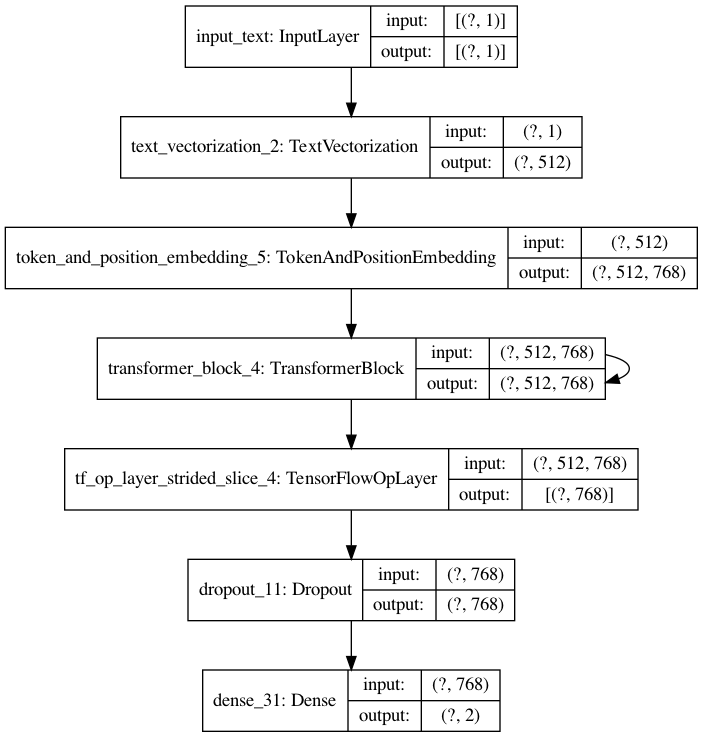

In [37]:
plot_model(model, show_shapes=True, show_layer_names=True)

Beleza, mas e os pesos pré treinados?


<center><img src='images/huggingface.png'  style="height:40%;width:40%"></center>



<center><img src='images/hf-transformers.png'  style="height:50%;width:50%"></center>

In [158]:
from transformers import BertTokenizer, pipeline, TFBertForPreTraining

In [138]:
REF_MODEL = 'neuralmind/bert-base-portuguese-cased'

In [139]:
model = TFBertForPreTraining.from_pretrained(REF_MODEL, from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForPreTraining: ['cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertForPreTraining from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForPreTraining from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForPreTraining were initialized from the PyTorch model.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.


In [140]:
unmasker = pipeline('fill-mask', model=REF_MODEL)
unmasker("Eu bebi muita [MASK] no carnaval")[:3]

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'sequence': '[CLS] Eu bebi muita água no carnaval [SEP]',
  'score': 0.3878271281719208,
  'token': 1991,
  'token_str': 'água'},
 {'sequence': '[CLS] Eu bebi muita cerveja no carnaval [SEP]',
  'score': 0.3672230541706085,
  'token': 18099,
  'token_str': 'cerveja'},
 {'sequence': '[CLS] Eu bebi muita coisa no carnaval [SEP]',
  'score': 0.18478259444236755,
  'token': 5664,
  'token_str': 'coisa'}]

In [141]:
from transformers import BertTokenizer, TFBertModel

tokenizer = BertTokenizer.from_pretrained(REF_MODEL)
model = TFBertModel.from_pretrained(REF_MODEL, from_pt=True)
text = "O rato roeu a roupa do Rei de Roma"
encoded_input = tokenizer(text, return_tensors='tf')
output = model(encoded_input)
output[0].shape, output[1].shape

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already

(TensorShape([1, 13, 768]), TensorShape([1, 768]))

In [142]:
encoded_input['input_ids'].shape

TensorShape([1, 13])

É o embedding de cada palavra e o segundo é o embedding de None ser o next sentence :)

Só que lembra que a gente tinha "mudanças específicas para os casos de finetuning?"

![](images/new_BERT_Overall.jpg)
[source](https://paperswithcode.com/method/bert#)




<center><img src='images/bert-specific.png'  style="height:50%;width:50%"></center>

In [129]:
from transformers import (
    TFBertForSequenceClassification,
    TFBertForMultipleChoice,
    TFBertForTokenClassification,
    TFBertForQuestionAnswering,
)

In [143]:
model = TFBertForSequenceClassification.from_pretrained(REF_MODEL, from_pt=True)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the P

Model: "tf_bert_for_sequence_classification_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108923136 
_________________________________________________________________
dropout_1400 (Dropout)       multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 108,924,674
Trainable params: 108,924,674
Non-trainable params: 0
_________________________________________________________________


In [144]:
model = TFBertForMultipleChoice.from_pretrained(REF_MODEL, from_pt=True)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForMultipleChoice: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertForMultipleChoice from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForMultipleChoice from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForMultipleChoice were not initialized from the PyTorch model and are newly initi

Model: "tf_bert_for_multiple_choice_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108923136 
_________________________________________________________________
dropout_1438 (Dropout)       multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  769       
Total params: 108,923,905
Trainable params: 108,923,905
Non-trainable params: 0
_________________________________________________________________


In [159]:
model = TFBertForTokenClassification.from_pretrained(REF_MODEL, from_pt=True)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertForTokenClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model

Model: "tf_bert_for_token_classification_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108923136 
_________________________________________________________________
dropout_1516 (Dropout)       multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 108,924,674
Trainable params: 108,924,674
Non-trainable params: 0
_________________________________________________________________


In [145]:
model = TFBertForQuestionAnswering.from_pretrained(REF_MODEL, from_pt=True)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForQuestionAnswering: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertForQuestionAnswering from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForQuestionAnswering from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForQuestionAnswering were not initialized from the PyTorch model and are

Model: "tf_bert_for_question_answering_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108923136 
_________________________________________________________________
qa_outputs (Dense)           multiple                  1538      
Total params: 108,924,674
Trainable params: 108,924,674
Non-trainable params: 0
_________________________________________________________________


# BERT e seus irmãos

Com o sucesso do BERT, **vários** outros modelos foram propostos, trazendo melhorias para a área. Vamos passar por alguns deles aqui :)


## RoBERTa

**r**obustly **o**ptimized **BERT** **a**pproach

Foi proposta uma variação no pré treinamento do BERT, propondo quatro ideias novas:

- Dynamic masking. Quando ocorre a máscara de tokens para a tarefa de MLM no caso do BERT, apenas uma unica máscara era considerada para cada observação no período de pré treinamento (static masking). No caso do RoBERTA, é usado um mascaramento dinâmico, ou seja, a estratégia de treinamento aplica uma nova máscara sempre que uma observação é alimentada ao modelo.

- A loss associada ao NSP é desconsiderada e ocorre a adição de um token separador entre documentos para a MLM task.

- Mini batches maiores. No caso do BERT, os mini batches tinham tamanho de 256; no RoBERTa eles tem tamanho de 8000

- Byte-level no caso do byte-pair encoding é maior, resultando em um vocabulario maior

## Albert

**a** **l**ite **BERT**

A idéia era gerar  um modelo mais leve que o BERT, mas que mantivesse o mesmo resultado em termos de performance

- O BERT padrão usa de 100k a 300k de parâmetros. O Albert usa em torno de 12k a 18k :)

As técnicas aplicadas foram as seguintes

- Cross-layer parameter sharing. Para gerar estabilidade do modelo, todos os parâmetros em todas as camadas foram compartilhados

- Factorized embedding parameterization. A matriz de embedding inicial tem uma dimensão $|v| \times |m|$, em que $|v|$ é o tamanho do vocabulário e $|m|$ é o número de dimensões do embedding. A ideia aqui, então é aplicar uma tecnica de fatorização de matrizes, decompondo a matriz de embedding em duas menores

- Inter-sentence coherence loss. A loss NSP é **substituida** por uma loss definida como sentence order prediction (SOP). A diferença é que ela apresenta exemplos negativos para os casos em que duas sentenças estão com a ordem trocada. Um exemplo negativo seria:

> “that is the question”, “to be, or not to be?”

## E muitos outros

### XLNet

Ao invés de prever todos os masked tokens independentes condicionalmente, o XLNET prevê os masked tokens de maneira auto-regressiva de forma aleatória

### SpanBERT

Ao invés de mascarar *tokens*, ele mascara spans (conjunto de tokens)

### ELECTRA



Ao invés de mascarar palavras, nós substituimos por tokens similares e tratamos como um problema de classificação binária em que se tenta prever se os tokens foram trocados ou não. É GAN-inspirado

### DistilBERT

Mesma linha do Albert, mas aplicam uma ténica de compressão de modelo chamada **destilação**

Modelo final tem 40% menos parâmetros, roda 60% mais rápido e tem 95% de performance mantida

**Entre outros**

In [146]:
from transformers import (
    TFRobertaForSequenceClassification,
    TFDistilBertForQuestionAnswering,
)

[Lista de modelos implementados](https://huggingface.co/transformers/model_doc/albert.html)
[Lista de modelos disponíveis](https://huggingface.co/models)

## Miscelânea



Para pessoas que estão treinando em GPU's não tão parrudas, é comum encontrarmos o seguinte erro:

<center><img src='images/gpu_oom.png'"></center>

E aí você tenta solucionar e descobre isso:

<center><img src='images/gpu_memory_frustration.png'"></center>

Felizmente existem duas opções que me ajudaram **muito**

### Gradient Accumulation

![](https://miro.medium.com/max/1260/1*ySxl2GQu0g07R7gWF4rizg.gif)

### FP16

> Mixed precision training offers significant computational speedup by performing operations in half-precision format, while storing minimal information in single-precision to retain as much information as possible in critical parts of the network. Since the introduction of Tensor Cores in the Volta and Turing architectures, significant training speedups are experienced by switching to mixed precision -- up to 3x overall speedup on the most arithmetically intense model architectures. 

[source](https://docs.nvidia.com/deeplearning/performance/mixed-precision-training/index.html)

# Obrigado! :)